# How to make 3-dimensional plots of gridded data

This example demonstrates how to plot a simple 3-dimensional representation of data stored in an `SHGrid` class instance using the method `plot3d()`. This plotting routine is useful for low resolution datasets, but becomes prohibitively slow when the spherical harmonic degree exceeds about 100.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pyshtools as pysh

pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina'  # if you are not using a retina display, comment this line

We start by initializing a set of spherical harmonic coefficients to zero, and then set a single harmonic of degree 10 and order 0 equal to unity:

In [2]:
lmax = 40  # This determines the spatial resolution of the gridded data and 3d image
clm = pysh.SHCoeffs.from_zeros(lmax)
clm.coeffs[0, 10, 0] = 1.
grid = clm.expand()

The `plot3d()` function first creates a 3-dimensional object from the data and then plots an image of the object from a given viewing geometry. The object is defined by its radius, which is computed from the data as

```
r = 1 + grid.data / abs(grid.data).max() / scale
```

As this equation shows, the gridded data are first normalized by their maximum value, they are then divided by a scaling factor, and the result is added to the unit sphere. For each point on the 3-dimensional object, the color correspond to the value of the original gridded data.

Here is what we get when we don't provide any optional arguments:

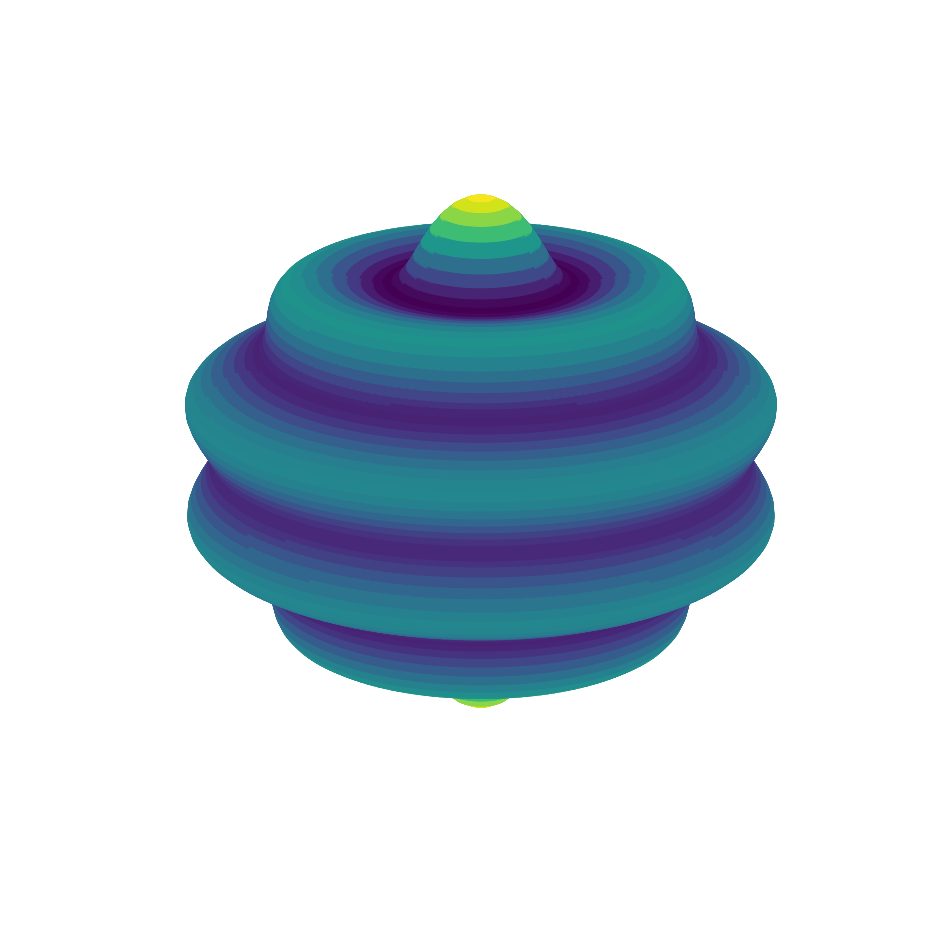

In [3]:
fig, ax = grid.plot3d(show=False)    # show=False is used to avoid a warning when plotting in inline mode

It is important to note that the returned axes is a matplotlib Axes3dSubplot object, and not a standard AxesSubplot.

By default, `plot3d()` uses the color map 'viridis', but this can be modified by the parameter `cmap`. The color values are interpolated linearly from the minimum to maximum data values, and the minimum and maximum values can be changed by providing the parameter `cmap_limits`. In the followig plot, we choose to use the 'RdBu' colormap, and to limit the data values to the range of -1.5 to 1.5. Furthermore, we will reverse the sense of the colormap progression by specifying the `cmap_reverse` parameter:

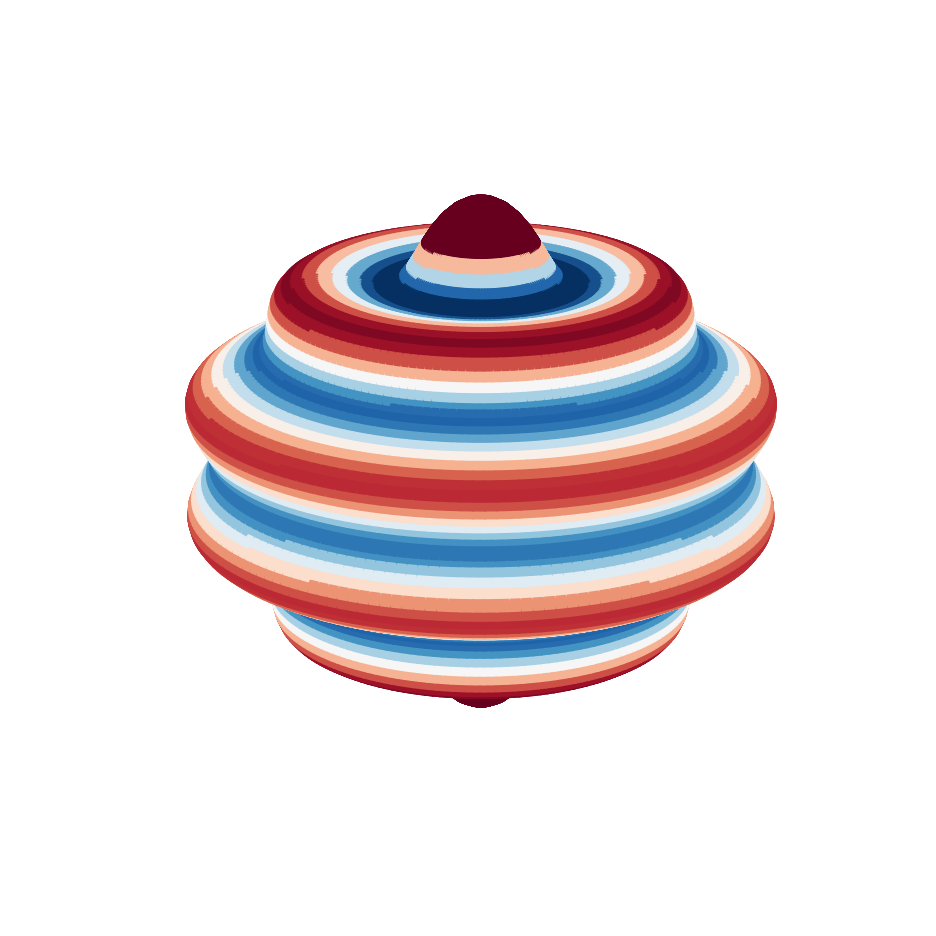

In [4]:
fig, ax = grid.plot3d(cmap='RdBu',
                      cmap_reverse=True,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

The optional `scale` parameter determines how much the radius of the object varies. The default value is 4: choosing a larger value will make the object look more like a sphere, whereas a smaller value will give more pronounced relief. Here we use a value of 20, which gives us more subtle wave-like features on a sphere:

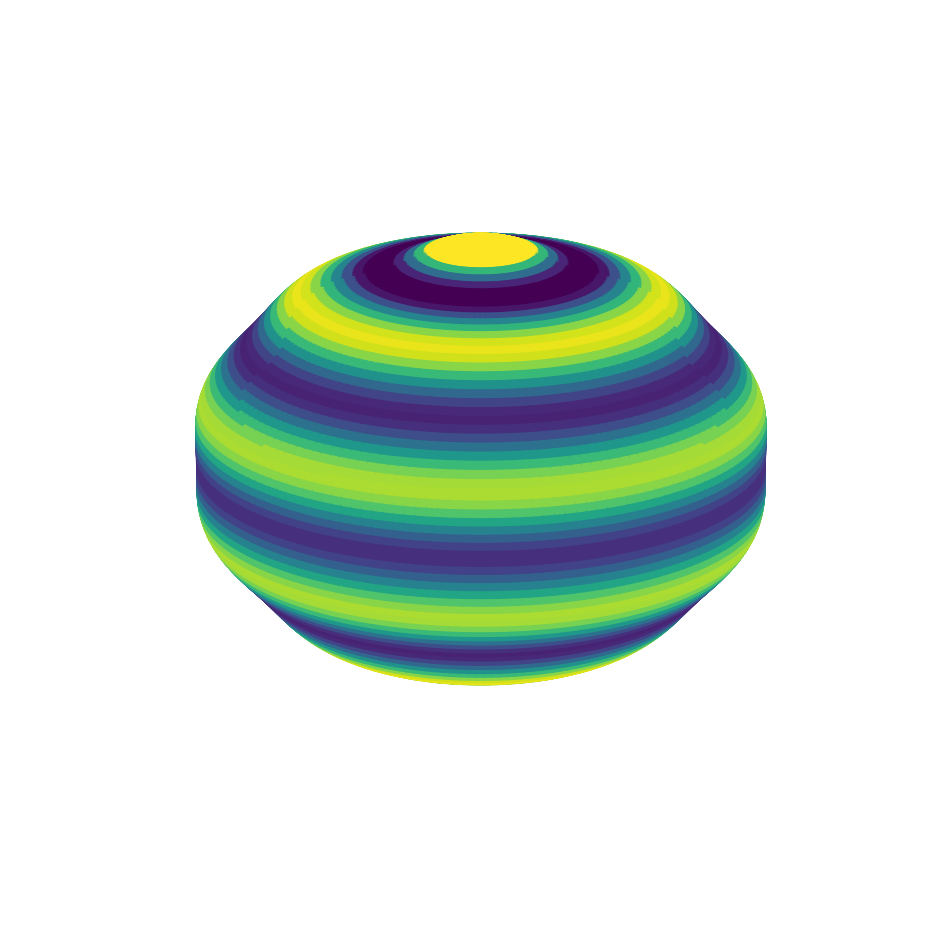

In [5]:
fig, ax = grid.plot3d(scale=20,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

The image can be viewed from any user specified `elevation` and `azimuth`. An elevation of 0° corresponds to looking directly at the equator, whereas 90° is looking at the north pole. The default values are 20° and 30°, respectively, and here we plot the data using a more poleward elevation of 60° instead.

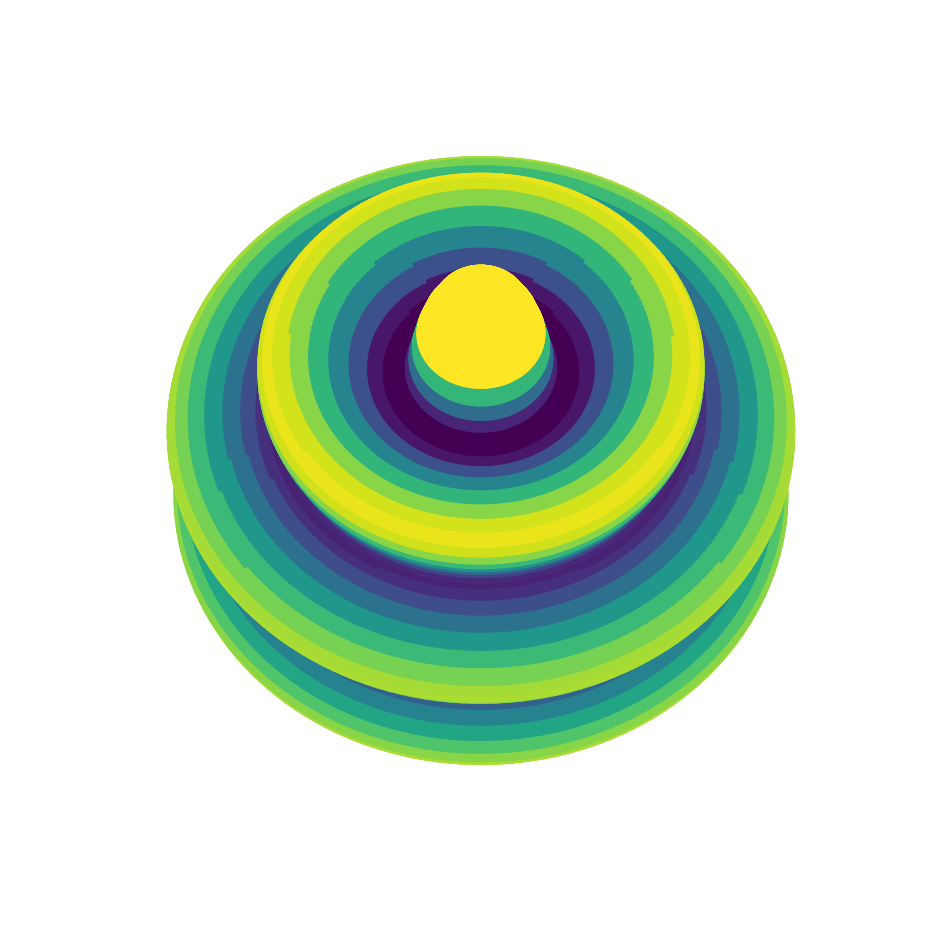

In [6]:
fig, ax = grid.plot3d(elevation=60,
                      azimuth=30,
                      scale=2,
                      cmap_limits=[-1.5, 1.5],
                      show=False)

It is straightforward to insert 3d images in any matplotlib subplot. In this example, we use `plt.subplots()` to create a row of three axes, and the `plot3d()` function takes as an argument a single specified axes. Internally, this routine first removes the axes (which is a matplotlib AxesSubplot object), and then replaces it with an Axes3dSubplot object. In this example, we plot three different harmonics and add labels to each image using the `title` parameter.

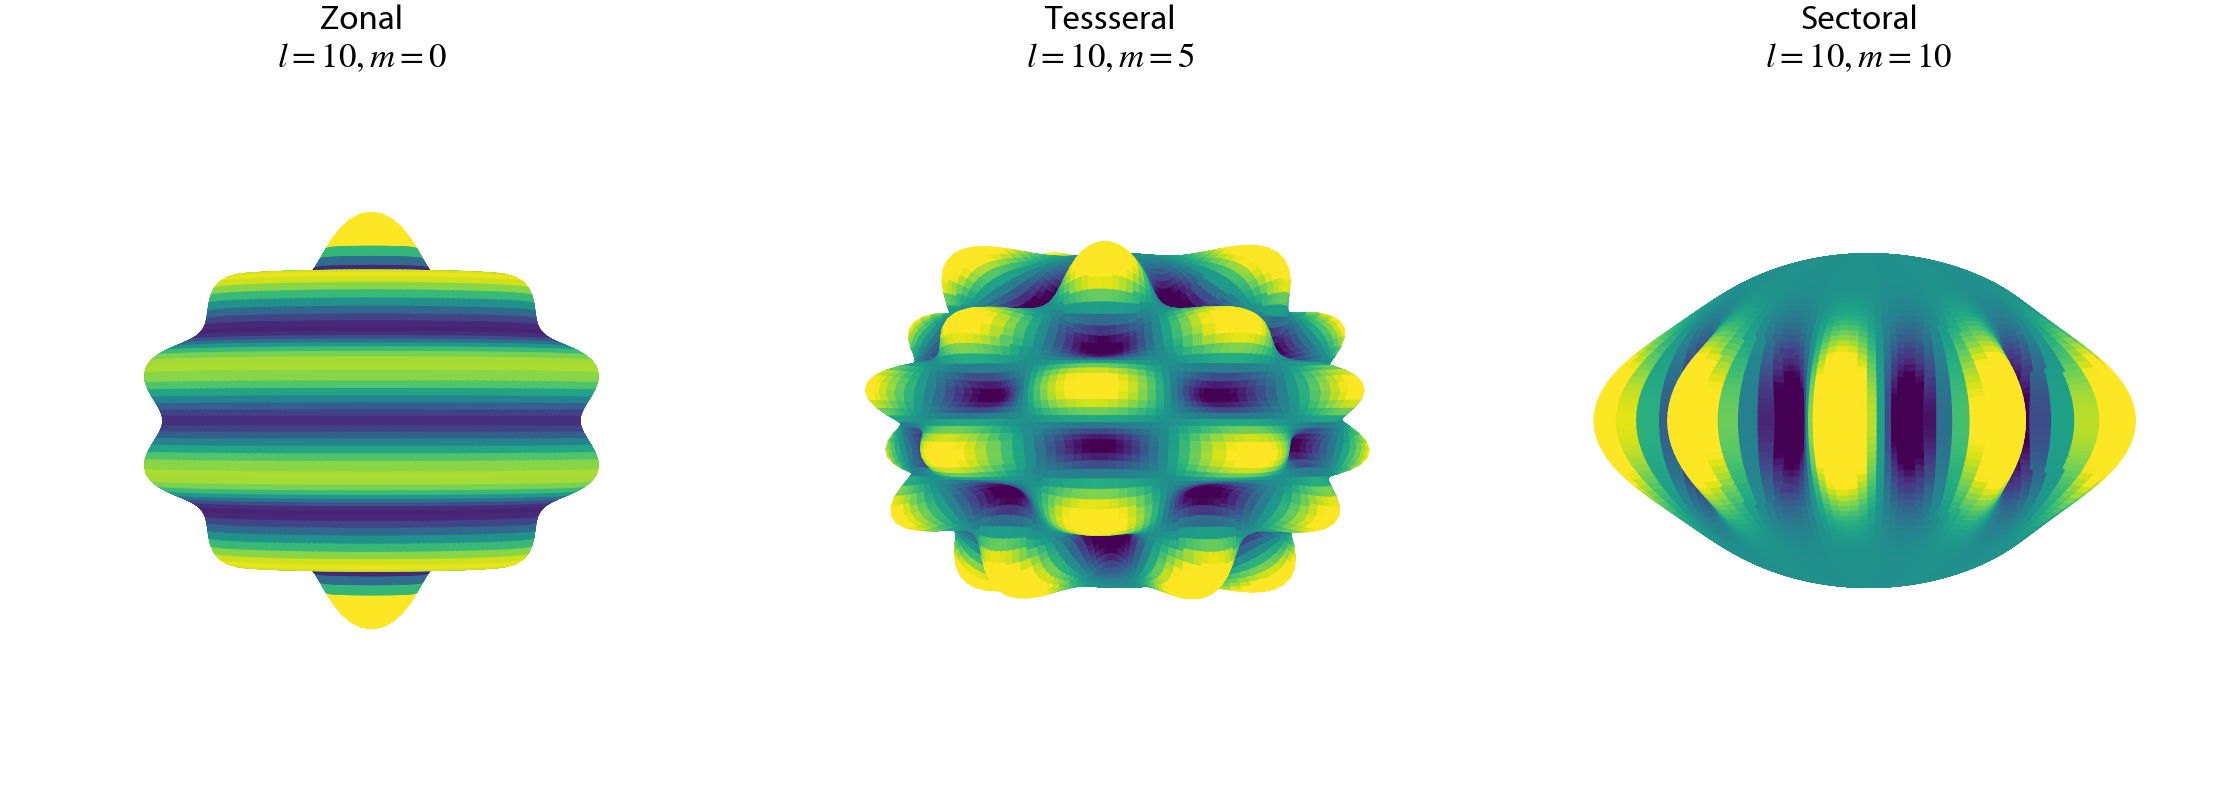

In [7]:
clm_tesseral = pysh.SHCoeffs.from_zeros(lmax)
clm_tesseral.coeffs[0, 10, 5] = 1.
grid_tesseral = clm_tesseral.expand()

clm_sectoral = pysh.SHCoeffs.from_zeros(lmax)
clm_sectoral.coeffs[0, 10, 10] = 1.
grid_sectoral = clm_sectoral.expand()

elevation = 0
azimuth = 150

fig, ax = plt.subplots(1,3, figsize=(10, 4))

grid.plot3d(elevation=elevation,
            azimuth=azimuth,
            cmap_limits=[-1.5, 1.5],
            ax=ax[0],
            title='Zonal\n$l=10, m=0$')
grid_tesseral.plot3d(elevation=elevation,
                     azimuth=azimuth,
                     cmap_limits=[-1.5, 1.5],
                     ax=ax[1],
                     title='Tessseral\n$l=10, m=5$')
grid_sectoral.plot3d(elevation=elevation,
                     azimuth=azimuth,
                     cmap_limits=[-1.5, 1.5],
                     ax=ax[2],
                     title='Sectoral\n$l=10, m=10$')
fig.tight_layout()

As mentioned above, when specifying the `ax` parameter, `plot3d()` will first remove the given axis from the figure and then replace it with a new matplotlib Axes3dSubplot object. Because of this, the original list of axes returned by `plt.subplots()` in the above example will not contain a reference to the newly created axis. To generate a new list of axes in the figure, it is only necessary to use the command

In [8]:
ax = fig.get_axes()